In [ ]:
import gym
import numpy as np

alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration rate

In [ ]:
# Initialize the environment
env = gym.make("Taxi-v3")
num_episodes = 10000
num_steps = 200

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
# Initialize Q-table
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))

In [ ]:
# Print initial Q-table
print("Initial Q-table:")
print(q_table)

Initial Q-table:
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [ ]:
# Q-learning loop
for episode in range(num_episodes):
    state = env.reset()
    done = False
    for step in range(num_steps):
        # Exploration-exploitation trade-off
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore action space
        else:
            action = np.argmax(q_table[state, :])  # Exploit learned values

        # Take action and observe next state, reward, and done flag
        next_state, reward, done, _ = env.step(action)

        # Update Q-table using Bellman equation
        q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * np.max(q_table[next_state, :]))

        state = next_state

        if done:
            break

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


In [ ]:
# Test the trained agent
total_reward = 0
num_test_episodes = 100
for _ in range(num_test_episodes):
    state = env.reset()
    done = False
    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        state = next_state

In [ ]:
# Calculate average reward
average_reward = total_reward / num_test_episodes
print("Average reward:", average_reward)


Average reward: -14.45


In [ ]:
# Print final Q-table
print("\nFinal Q-table:")
print(q_table)


Final Q-table:
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.35741213e+00 -2.34139538e+00 -2.39630212e+00 -2.34927495e+00
  -2.27325184e+00 -1.00659311e+01]
 [-1.85200581e+00 -1.50978205e+00 -1.87673313e+00 -1.56308468e+00
  -7.50400000e-01 -9.21175974e+00]
 ...
 [-1.19560465e+00 -2.05898696e-01 -1.29266962e+00 -1.18737036e+00
  -1.90600000e+00 -1.96000000e+00]
 [-2.08516608e+00 -2.08582076e+00 -2.08362081e+00 -2.08260328e+00
  -4.25370508e+00 -5.10734875e+00]
 [ 8.22565993e-01  2.67163969e-01 -8.38466761e-03  1.08938153e+01
  -1.55164000e+00 -1.00000000e+00]]


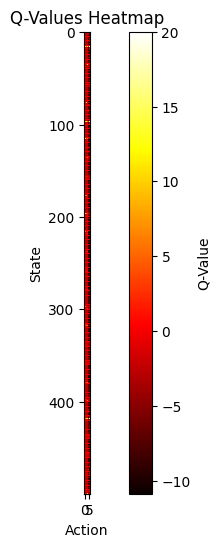

In [ ]:
# Visualize the Q-values
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.imshow(q_table, cmap='hot', interpolation='nearest')
plt.title('Q-Values Heatmap')
plt.xlabel('Action')
plt.ylabel('State')
plt.colorbar(label='Q-Value')
plt.show()